In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
print ("Packages Loaded")

Packages Loaded



(" Type of 'train_X' is ", <type 'numpy.ndarray'>)
 Shape of 'train_X' is (1, 20)
(" Type of 'train_Y' is ", <type 'numpy.ndarray'>)
 Shape of 'train_Y' is (1, 20)


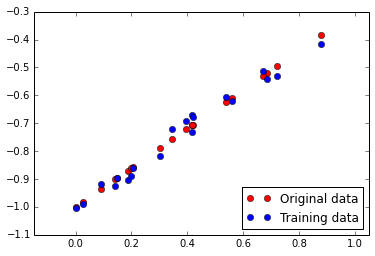

In [36]:
# generate train data
def f(x, a, b):
#     n = x.size
#     vals = np.zeros((1, n))
    return x * a + b
    
np.random.seed(1)
m = 20
Wref = 0.7
bref= -1.
noise_var = 0.001
train_X   = np.ones((1, m))
train_X   = np.random.random((1, n))
ref_Y = f(train_X, Wref, bref)
train_Y   = ref_Y + np.sqrt(noise_var)*np.random.randn(1, n)
train_X = np.float32(train_X)
train_Y = np.float32(train_Y)
print ("")
print (" Type of 'train_X' is ", type(train_X))
print (" Shape of 'train_X' is %s" % (train_X.shape,))
print (" Type of 'train_Y' is ", type(train_Y))
print (" Shape of 'train_Y' is %s" % (train_Y.shape,))

#plot
plt.figure(1)
plt.plot(train_X[0, :], ref_Y[0, :], 'ro', label='Original data')
plt.plot(train_X[0, :], train_Y[0, :], 'bo', label='Training data')
plt.axis('equal')
plt.legend(loc='lower right')

In [115]:
# build the modal for Linear model

epochs = 1000
step = 50
learning_rate = 0.1

X = tf.placeholder(tf.float32, shape=(1, m), name = "input")
y = tf.placeholder(tf.float32, shape=(1, m), name = "output")
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")
print "X tensor as ", X

# graph
y_ = W * X + b

#cost 
cost = tf.reduce_mean(tf.pow(y_ - y, 2))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
# optimizer = tf.train.AdamOptimizer().minimize(cost)

# initialize
init = tf.global_variables_initializer()

X tensor as  Tensor("input_26:0", shape=(1, 20), dtype=float32)


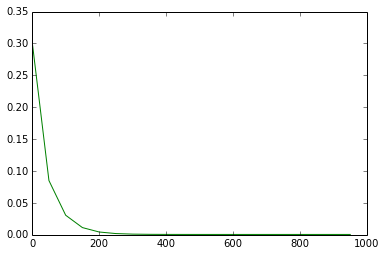

In [116]:
# let's run
sess = tf.Session()
sess.run(init)

plt.figure(2)
learning_paths = np.empty((0, 2))

for epoch in range(epochs):
    sess.run(optimizer, feed_dict={X:train_X, y: train_Y})
    
    if epoch % step == 0:
        costval = sess.run(cost, feed_dict={X: train_X, y:train_Y})
#         print ("Epoch:", "%04d"%(epoch+1), "cost=", "{:.5f}".format(costval))
        plt.plot(epoch, costval, "g")
        learning_paths = np.append(learning_paths, [[epoch, costval]], axis = 0)

        Wtemp = sess.run(W)
        btemp = sess.run(b)
#         print (" Wtemp is", "{:.4f}".format(Wtemp), "btemp is", "{:.4f}".format(btemp))
#         print (" Wref is", "{:.4f}".format(Wref), "bref is", "{:.4f}".format(bref))

plt.plot(learning_paths[:, 0], learning_paths[:, 1], "g", label="cost by epoch")
# plt.axis('cost/epoch')
plt.show()        